## Laboratorium 3 - algorytm *k* Najbliższych Sąsiadów (*k*NN)


### Opis
Celem laboratorium jest implementacja klasyfikatora *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) oraz zapoznanie się z innymi metrykami klasyfikacji.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana bez wykorzystania zewnętrznych bibliotek.


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator *k* najbliższych sąsiadów (*k*NN)** i uruchom predykcję.
* Opisz jak zmieniają się wyniki klasyfikatora dla różnych wartości *k*, dla różnej liczby klas oraz dla różnej liczby cech.
* Wyświetl tablicę pomyłek (*confusion matrix*). W tym przypadku możesz zastosować gotową implementację z biblioteki `scikit-learn` <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>.
* Odszukaj przynajmniej dwie inne (niż accuracy) metryki przytatne w klasyfikacji na stronie <https://scikit-learn.org/stable/modules/model_evaluation.html> i opisz ich wyniki. Wytłumacz czym się różnią i co można z nich odczytać.
* Opisz różnicę wyników klasyfikacji obu algorytmów (NN i *k*NN)?


> UWAGA: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.

### PONIŻEJ WYKONAJ ZADANIE

In [1]:
import numpy as np
import random
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from scipy import stats
from sklearn import metrics

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [2]:
#wybór klas
def choose_classes(classes):
    for i in range(len(classes)):
        if i == 0:
            c_train = np.array(train[train[:,0] == classes[i]])
            c_test = np.array(test[test[:,0] == classes[i]])
        else:
            c_train = np.vstack((c_train,train[train[:,0] == classes[i]]))
            c_test = np.vstack((c_test,test[test[:,0] == classes[i]]))
    return c_train, c_test

In [3]:
#obliczanie odległości między punktami
def edist(p1, p2, features):
    a=[]
    b=[]
    for i in features:
        a.append(p1[i])
        b.append(p2[i])
        
    c=0
    
    for i in range(len(features)):
        c += (a[i]-b[i])**2
    
    return c**(1/2) 

In [4]:
#wykres dla 2 cech
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
def my_2dplot(feature, classes, c_train, c_test):
    color = []
    for i in range(41):
        color.append((random.randint(0,80)/100,random.randint(0,80)/100,random.randint(0,80)/100))
    
    plt.figure()
    plt.title("Próbki")
    plt.xlabel(f"Cecha {features[0]}")
    plt.ylabel(f"Cecha {features[1]}")

    nazwy = {1:'Quercus suber',
             2:'Salix atrocinera',
             3: 'Populus nigra',
             4: 'Alnus sp.',
             5: 'Quercus robur',
             6:'Crataegus monogyna',
             7:'Ilex aquifolium',
             8: 'Nerium oleander',
             9:'Betula pubescens',
             10:'Tilia tomentosa',
             11:'Acer palmatum',
             12:'Celtis sp.',
             13:'Corylus avellana',
             14:'Castanea sativa',
             15:'Populus alba',
             16:'Acer negundo',
             17:'Taxus bacatta',
             18:'Papaver sp.',
             19:'Polypolium vulgare',
             20:'Pinus sp.'
            
            } 

    for cl in classes:
        plt.scatter(x=c_train[c_train[:,0] == cl][:,feature[0]],
                    y=c_train[c_train[:,0] == cl][:,features[1]],
                    label='Train class: '+nazwy[cl],
                    marker = '.',
                    c=color[cl],
                    alpha=0.8
                   )
    
    for cl in classes:
        plt.scatter(x=c_test[c_test[:,0] == cl][:,feature[0]],
                    y=c_test[c_test[:,0] == cl][:,features[1]],
                    label='Pred class: '+nazwy[cl],
                    marker='o',
                    c=color[cl],
                    alpha=0.2
                    )
        
    plt.legend()
    plt.show()

In [5]:
def kNN(train, test, features, n):
    classified = np.copy(test)
    for te in range(test.shape[0]):
        distances = np.full((train.shape[0], 2),100.)
        for tr in range(train.shape[0]):
            dist = edist(test[te], train[tr], features)
            distances[tr,0] = dist
            distances[tr,1] = train[tr,0]
        distances = distances[distances[:,0].argsort()]
        x = stats.mode(distances[0:n,1])
        classified[te,0] = x[0][0]
            
    return classified

In [14]:
def get_mertics(ok,pred):
    cm = metrics.confusion_matrix(ok[:,0], pred[:,0])
    acc = metrics.accuracy_score(ok[:,0], pred[:,0])
    bacc = metrics.balanced_accuracy_score(ok[:,0], pred[:,0])
    f1 = metrics.f1_score(ok[:,0], pred[:,0],average='micro')
    return cm, acc, bacc, f1

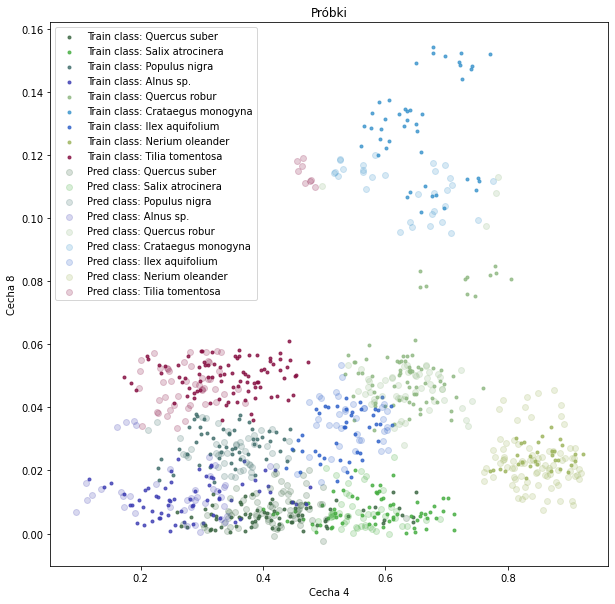

In [15]:
features = [4,8]
classes=[1,2,3,4,5,6,7,8,10]
k=7
#tworzenie podzbiorów dla wybranych klas
train_10,test_10 = choose_classes(classes)

#klasyfikacja zbioru testowego na podstawie treningowego
knn_10_7 = kNN(train_10,test_10,features, k)


#Wyświetlenie wyników
my_2dplot(features, classes, train_10, knn_10_7)

In [16]:
cm7, acc7, bacc7, f17 = get_mertics(test_10,knn_10_7)

Accuracy dla 9 klas oraz 2 cech, dla kNN=7:             0.7665289256198347 
Balanced ccuracy dla 9 klas oraz 2 cech, dla kNN=7:     0.7451178451178451 
F1 score dla 9 klas oraz 2 cech, dla kNN=7:             0.7665289256198347 
Confusion matrix:


Text(0.5, 1.0, 'Confusion matrix')

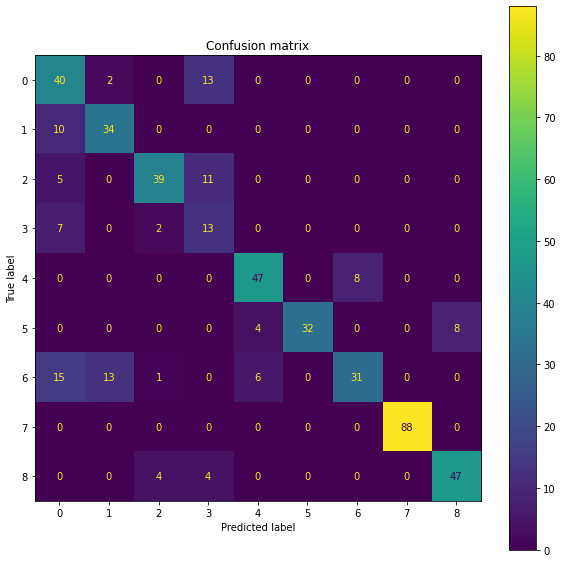

In [17]:
print(f'Accuracy dla {len(classes)} klas oraz {len(features)} cech, dla kNN={k}: {acc7:30} ')
print(f'Balanced ccuracy dla {len(classes)} klas oraz {len(features)} cech, dla kNN={k}: {bacc7:22} ')
print(f'F1 score dla {len(classes)} klas oraz {len(features)} cech, dla kNN={k}: {f17:30} ')
print('Confusion matrix:')

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm7)
disp.plot()
plt.title('Confusion matrix')

### Wnoiski
- Accuracy posiada wade w postaci niedokłądnego wyniku przy niezrównoważonych klasach, z problemem tym radzi sobie wskażnik Balnced accuracy
- f1 score - liczy średnią z precyzji i czułości(oszukjąc możemy uzyskać 100% precyzji uzyskując 0% czułości i na odwrót), najlepszy wynik dla f1 score to 50%


# Wpływ k

In [ ]:
features = [4,11]
classes=[1,2,3,4]

#tworzenie podzbiorów dla wybranych klas
train_10,test_10 = choose_classes(classes)

#klasyfikacja zbioru testowego na podstawie treningowego
knn_10_7 = kNN(train_10,test_10,features, 7)
knn_10_5 = kNN(train_10,test_10,features, 5)
knn_10_3 = kNN(train_10,test_10,features, 3)
knn_10_1 = kNN(train_10,test_10,features, 1)

cm7, acc7, bacc7, f17 = get_mertics(test_10,knn_10_7)
cm5, acc5, bacc5, f15 = get_mertics(test_10,knn_10_5)
cm3, acc3, bacc3, f13 = get_mertics(test_10,knn_10_3)
cm1, acc1, bacc1, f11 = get_mertics(test_10,knn_10_1)

plt.figure(figsize=(4, 4))
plt.plot([1,3,5,7],[acc1,acc3,acc5,acc7])
plt.xlabel(f"Accuracy")
plt.ylabel(f"K")

In [ ]:
features = [4,8]
classes=[1,2,3,4]

#tworzenie podzbiorów dla wybranych klas
train_10,test_10 = choose_classes(classes)

#klasyfikacja zbioru testowego na podstawie treningowego
knn_10_7 = kNN(train_10,test_10,features, 7)
knn_10_5 = kNN(train_10,test_10,features, 5)
knn_10_3 = kNN(train_10,test_10,features, 3)
knn_10_1 = kNN(train_10,test_10,features, 1)

cm7, acc7, bacc7, f17 = get_mertics(test_10,knn_10_7)
cm5, acc5, bacc5, f15 = get_mertics(test_10,knn_10_5)
cm3, acc3, bacc3, f13 = get_mertics(test_10,knn_10_3)
cm1, acc1, bacc1, f11 = get_mertics(test_10,knn_10_1)

plt.figure(figsize=(4, 4))
plt.plot([1,3,5,7],[acc1,acc3,acc5,acc7])
plt.xlabel(f"Accuracy")
plt.ylabel(f"K")

In [ ]:
features = [7,10]
classes=[1,2,3,4]

#tworzenie podzbiorów dla wybranych klas
train_10,test_10 = choose_classes(classes)

#klasyfikacja zbioru testowego na podstawie treningowego
knn_10_7 = kNN(train_10,test_10,features, 7)
knn_10_5 = kNN(train_10,test_10,features, 5)
knn_10_3 = kNN(train_10,test_10,features, 3)
knn_10_1 = kNN(train_10,test_10,features, 1)

cm7, acc7, bacc7, f17 = get_mertics(test_10,knn_10_7)
cm5, acc5, bacc5, f15 = get_mertics(test_10,knn_10_5)
cm3, acc3, bacc3, f13 = get_mertics(test_10,knn_10_3)
cm1, acc1, bacc1, f11 = get_mertics(test_10,knn_10_1)

plt.figure(figsize=(4, 4))
plt.plot([1,3,5,7],[acc1,acc3,acc5,acc7])
plt.xlabel(f"Accuracy")
plt.ylabel(f"K")

### Wnoiski
- Zwiększenie k zwykle poprawia skuteczność klasyfikacji algorytmu knn
- Przy ,,odpowiednio dobranych próbkach możemy uzyskać efekt w którym zwiększenie k nie poprawi pracy algorytmu, w moim przypadku wybór pary cech 4 i 8 powodował najlepsze wynik dla k=3 powyżej skuteczność spadała 
- Zwiększenie k wpływa negatywnie na czas pracy algorytmu

# Wpływ ilości klas

In [ ]:
features = [4,11]

#tworzenie podzbiorów dla wybranych klas
train_2,test_2 = choose_classes([1,2])
train_4,test_4 = choose_classes([1,2,3,4])
train_6,test_6 = choose_classes([1,2,3,4,5,6])
train_8,test_8 = choose_classes([1,2,3,4,5,6,7,8])
train_10,test_10 = choose_classes([1,2,3,4,5,6,7,8,9,10])


#klasyfikacja zbioru testowego na podstawie treningowego
knn_2 = kNN(train_2,test_2,features, 3)
knn_4 = kNN(train_4,test_4,features, 3)
knn_6 = kNN(train_6,test_6,features, 3)
knn_8 = kNN(train_8,test_8,features, 3)
knn_10 = kNN(train_10,test_10,features, 3)


cm2, acc2, bacc2, f12 = get_mertics(test_2,knn_2)
cm4, acc4, bacc4, f14 = get_mertics(test_4,knn_4)
cm6, acc6, bacc6, f16 = get_mertics(test_6,knn_6)
cm8, acc8, bacc8, f18 = get_mertics(test_8,knn_8)
cm10, acc10, bacc10, f110 = get_mertics(test_10,knn_10)

plt.figure(figsize=(4, 4))
plt.plot([2,4,5,8,10],[acc2,acc4,acc6,acc8, acc10])
plt.xlabel(f"Accuracy")
plt.ylabel(f"Ilość klas")

In [ ]:
features = [4,8]

#tworzenie podzbiorów dla wybranych klas
train_2,test_2 = choose_classes([1,2])
train_4,test_4 = choose_classes([1,2,3,4])
train_6,test_6 = choose_classes([1,2,3,4,5,6])
train_8,test_8 = choose_classes([1,2,3,4,5,6,7,8])
train_10,test_10 = choose_classes([1,2,3,4,5,6,7,8,9,10])


#klasyfikacja zbioru testowego na podstawie treningowego
knn_2 = kNN(train_2,test_2,features, 3)
knn_4 = kNN(train_4,test_4,features, 3)
knn_6 = kNN(train_6,test_6,features, 3)
knn_8 = kNN(train_8,test_8,features, 3)
knn_10 = kNN(train_10,test_10,features, 3)


cm2, acc2, bacc2, f12 = get_mertics(test_2,knn_2)
cm4, acc4, bacc4, f14 = get_mertics(test_4,knn_4)
cm6, acc6, bacc6, f16 = get_mertics(test_6,knn_6)
cm8, acc8, bacc8, f18 = get_mertics(test_8,knn_8)
cm10, acc10, bacc10, f110 = get_mertics(test_10,knn_10)

plt.figure(figsize=(4, 4))
plt.plot([2,4,5,8,10],[acc2,acc4,acc6,acc8, acc10])
plt.xlabel(f"Accuracy")
plt.ylabel(f"Ilość klas")

### Wnoiski
- Zwiększenie ilości klas wpływa negatywnie na wyniki klasyfikatora

# Wpływ ilości cech

In [ ]:
classes=[1,2,3,4]

#tworzenie podzbiorów dla wybranych klas
train_2,test_2 = choose_classes([1,2])

#klasyfikacja zbioru testowego na podstawie treningowego
knn_2 = kNN(train_2,test_2,[4,8], 3)
knn_3 = kNN(train_2,test_2,[4,8,10], 3)
knn_4 = kNN(train_2,test_2,[4,6,8,10], 3)
knn_5 = kNN(train_2,test_2,[4,6,8,10,12], 3)
knn_6 = kNN(train_2,test_2,[4,6,8,10,12,14], 3)

cm2, acc2, bacc2, f12 = get_mertics(test_2,knn_2)
cm3, acc3, bacc3, f13 = get_mertics(test_2,knn_3)
cm4, acc4, bacc4, f14 = get_mertics(test_2,knn_4)
cm5, acc5, bacc5, f15 = get_mertics(test_2,knn_5)
cm6, acc6, bacc6, f16 = get_mertics(test_2,knn_6)

plt.figure(figsize=(4, 4))
plt.plot([2,4,5,8,10],[acc2,acc3,acc4,acc5, acc6])
plt.xlabel(f"Accuracy")
plt.ylabel(f"Ilość cech")

### Wnoiski
- Zwiększenie ilości cech na podstawie których dokonujemy klasyfikacji wpływa pozytywnie na jej wyniki
- Zwiększanie ilości cech w pewnym momencie przestaje się opłacać poniewż zysk z dodania kolejnej cechy jest zbyt względem kosztu obliczeń